In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/tips.csv')

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<ipython-input-11-b52b3903b475>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.pie(df.groupby('sex').sum()['tip'], explode=[.02,.02], labels=df['sex'].unique(),colors=sns.color_palette('deep'),textprops={'fontsize': 12,}, autopct='%.2f%%', shadow=True, )


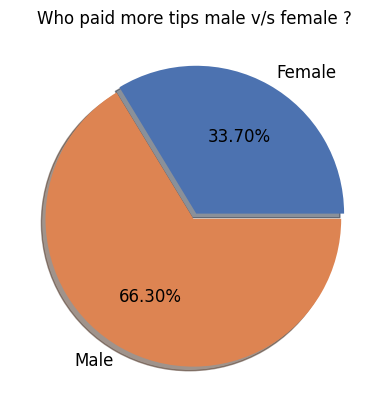

In [11]:
plt.pie(df.groupby('sex').sum()['tip'], explode=[.02,.02], labels=df['sex'].unique(),colors=sns.color_palette('deep'),textprops={'fontsize': 12,}, autopct='%.2f%%', shadow=True, )
plt.title('Who paid more tips male v/s female ?')
plt.show()

<ipython-input-12-a044f038b2e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  splot = df.groupby('day').sum()['total_bill'].plot(kind='bar', colormap='Dark2')


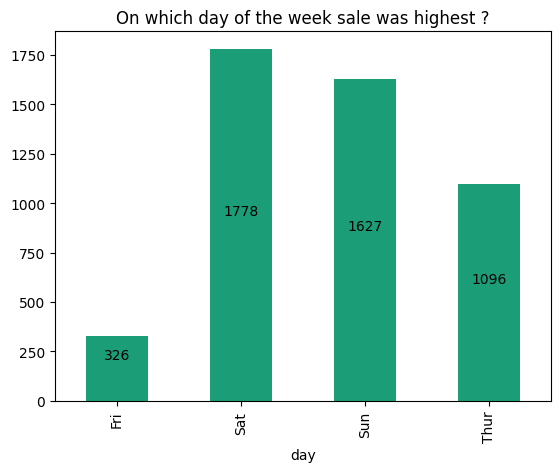

In [12]:
splot = df.groupby('day').sum()['total_bill'].plot(kind='bar', colormap='Dark2')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()/2),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('On which day of the week sale was highest ?')
plt.show()

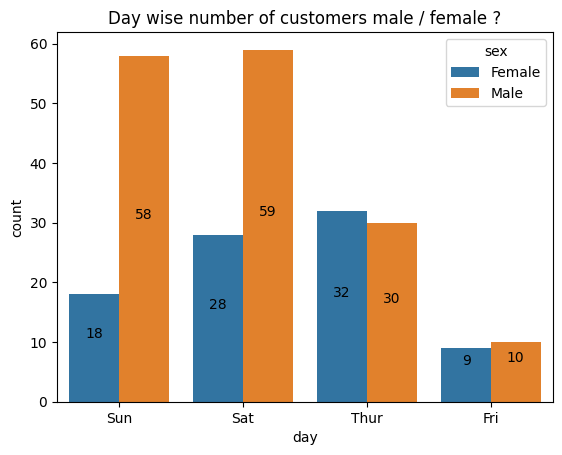

In [13]:
splot = sns.countplot(x='day', data=df, hue='sex')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()/2),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Day wise number of customers male / female ?')
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

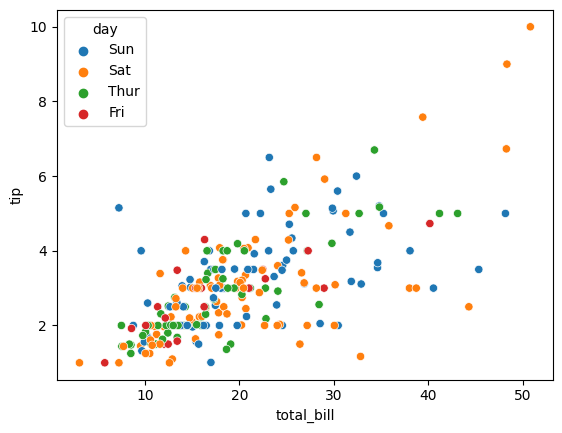

In [14]:
sns.scatterplot(x=df.total_bill, y = df.tip, hue=df.day)

<ipython-input-15-2a1324ee23f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  splot = df.groupby('time').sum()['total_bill'].plot(kind='bar', color='#2F8F47')


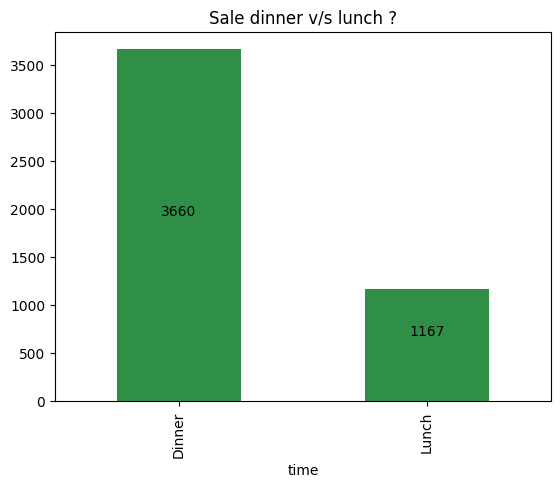

In [15]:
splot = df.groupby('time').sum()['total_bill'].plot(kind='bar', color='#2F8F47')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()/2),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Sale dinner v/s lunch ?')
plt.show()

<ipython-input-16-4bf186d822b4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  splot = df.groupby('smoker').sum()['total_bill'].plot(kind='bar', color='#2F8F77')


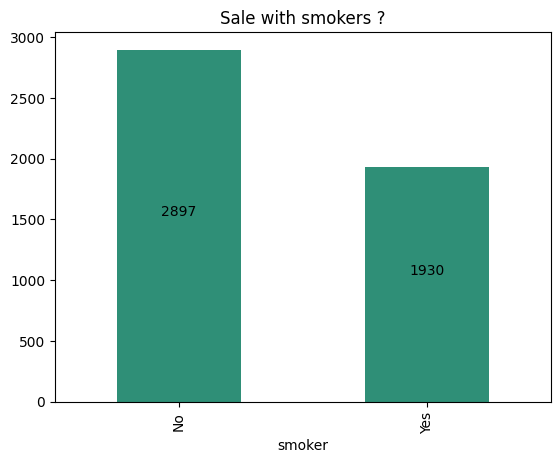

In [16]:
splot = df.groupby('smoker').sum()['total_bill'].plot(kind='bar', color='#2F8F77')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()/2),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Sale with smokers ?')
plt.show()

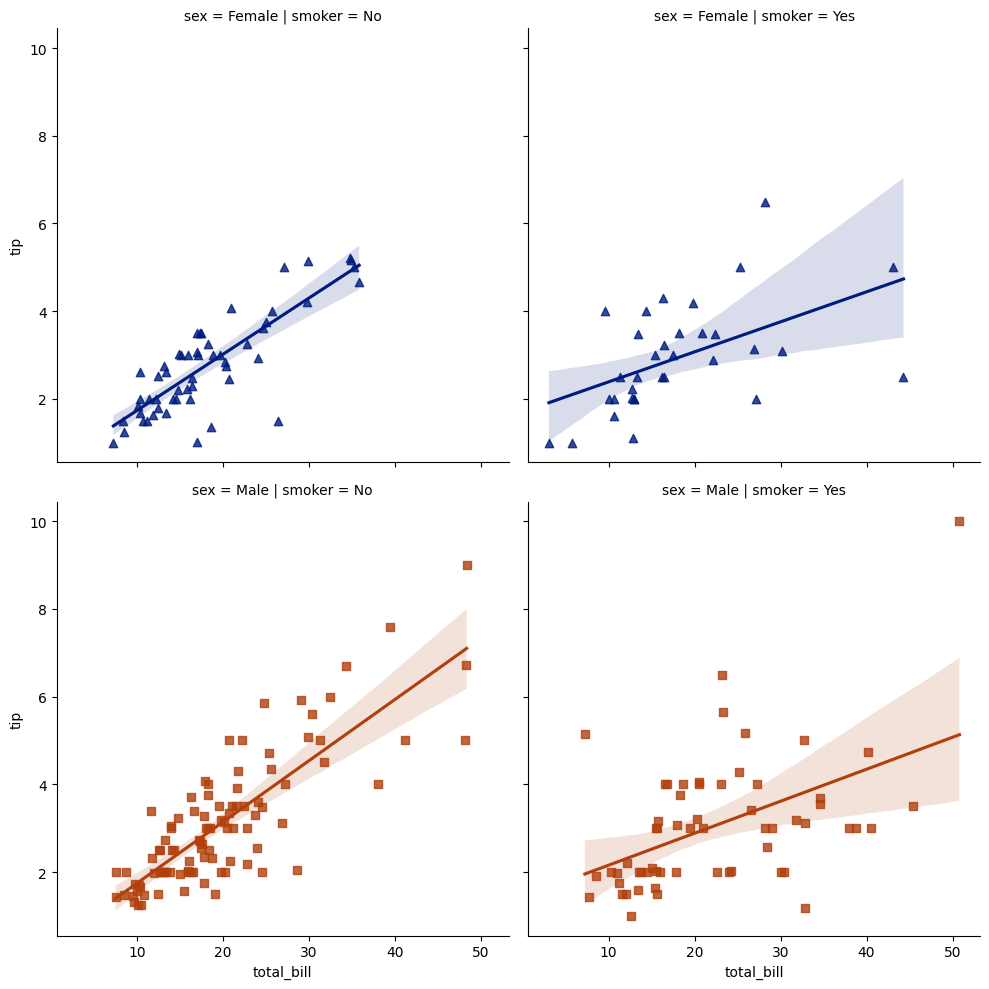

In [17]:
sns.lmplot(data=df, x='total_bill', y='tip',hue='sex', row='sex', col = 'smoker', markers=['^','s'], palette='dark')


<ipython-input-18-86f11ad0752f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('sex').sum()


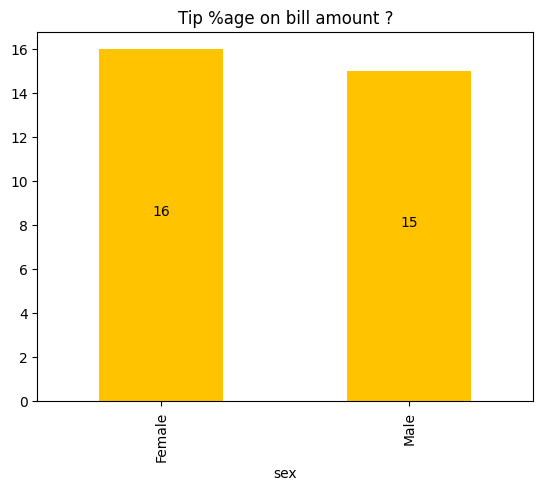

In [18]:
grouped = df.groupby('sex').sum()

grouped['tip_%'] = round(grouped['tip']/grouped['total_bill']*100)

splot = grouped['tip_%'].plot(kind='bar', color='#FFC300')

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()/2),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Tip %age on bill amount ?')
plt.show()

<ipython-input-19-a38e25c08a8d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('day').sum()


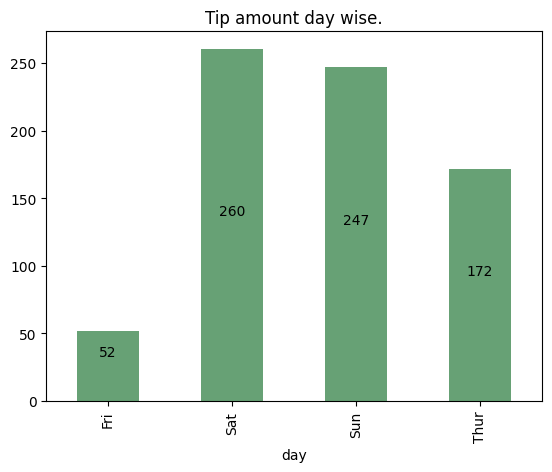

In [19]:
grouped = df.groupby('day').sum()

splot = grouped['tip'].plot(kind='bar', color='#67A175')

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()/2),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Tip amount day wise.' )
plt.show()

<ipython-input-20-3cf1754568b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('size').sum()


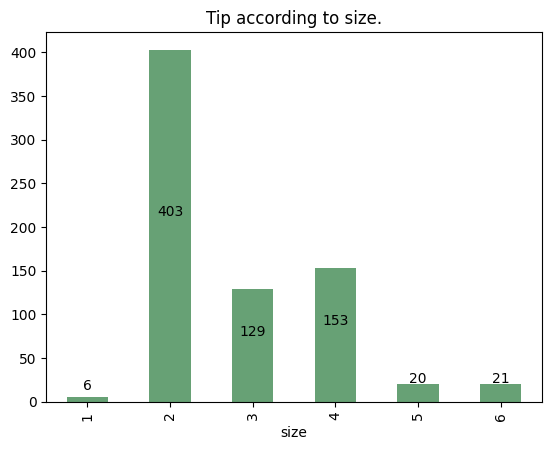

Looks like couples paid more tips.


In [20]:
grouped = df.groupby('size').sum()

splot = grouped['tip'].plot(kind='bar', color='#67A175')

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()/2),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Tip according to size.' )
plt.show()

print('Looks like couples paid more tips.')

In [28]:
plot = px.scatter(data_frame=df, x='total_bill', y='tip', size='size', color='day', trendline='ols')
plot.show()

In [29]:
plot = px.scatter(data_frame=df, x='total_bill', y='tip', size='size', color='sex', trendline='ols')
plot.show()

In [30]:
plot = px.scatter(data_frame=df, x='total_bill', y='tip', size='size', color='time', trendline='ols')
plot.show()

In [31]:
fig = px.pie(df, values='tip', names='time', hole=0.5)
fig.show()

In [32]:
fig = px.pie(df, values='tip', names='smoker', hole=0.5)
fig.show()


fig = px.pie(df, values='tip', names='sex', hole=0.5)
fig.show()


fig = px.pie(df, values='tip', names='day', hole=0.5)
fig.show()

In [33]:
df['smoker'] = df['smoker'].map({'No':0, 'Yes':1})
df['sex'] = df['sex'].map({'Female':0, 'Male':1})
df['day'] = df['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})
df['time'] = df['time'].map({'Lunch':0, 'Dinner':1})

In [34]:
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


In [35]:
X = np.array(df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']])


In [36]:
X.shape


(244, 6)

In [37]:
y = np.array(df['tip'])


In [38]:
y.shape


(244,)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)


LinearRegression()

In [43]:
lr.predict(X_test)

array([2.46111925, 2.80672648, 1.91514013, 1.92171828, 2.29216628,
       2.2325112 , 4.57088451, 5.50291997, 2.0088076 , 4.30770251,
       2.24878063, 4.14277853, 2.75505576, 1.87605979, 1.82326569,
       2.8006637 , 3.34864326, 2.99041726, 2.15112214, 5.15751897,
       3.12243624, 3.1410663 , 2.55910097, 1.0588268 , 2.20631996,
       2.38364468, 2.92575903, 3.14766791, 2.12819542, 3.54199705,
       3.00866751, 2.33898139, 2.4241913 , 2.32597907, 1.87362665,
       3.14169405, 5.43027495, 2.83280653, 4.39338449, 3.34931803,
       3.29321492, 2.40405912, 2.84919699, 1.85798496, 2.5441846 ,
       5.00694907, 2.85925423, 2.49669472, 2.04621073])

In [44]:
data = np.array([[28, 1, 0, 0, 1, 4]])
lr.predict(data)


array([4.00988048])